In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Importation du dataset

df = pd.read_csv(r'C:/Users/chahd/Projet Statistique 2eme sem/soil__pollution.csv')

In [3]:
# Affiche les premières lignes du DataFrame
df.head()  


,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
0,CASE_100000,2024-09-12,Africa,Pakistan,Lead,78.04,8.30,35.6,64.9,62.4,...,Sandy,1.98,Gastrointestinal Disease,Moderate,Breathing Difficulty,Adults,Male,Government Regulation,No,Yes
1,CASE_100001,2024-01-01,Africa,Germany,Lead,16.33,7.96,31.0,73.1,8.2,...,Silty,9.71,Cancer,Mild,Breathing Difficulty,Elderly,Both,Community Awareness,Yes,No
2,CASE_100002,2025-02-24,Europe,Germany,Lead,167.33,5.35,16.4,33.8,121.7,...,Clay,5.49,Gastrointestinal Disease,Severe,Nausea,Children,Both,Soil Remediation,Yes,No
3,CASE_100003,2024-09-24,Asia,USA,Lead,89.23,5.66,31.4,30.5,116.9,...,Silty,3.98,Neurological Disorder,Severe,Fatigue,Adults,Male,Community Awareness,Yes,No
4,CASE_100004,2023-05-24,Africa,India,Chromium,93.93,7.64,17.0,58.6,237.0,...,Loamy,0.94,Skin Disease,Moderate,Breathing Difficulty,Children,Female,Government Regulation,Yes,Yes


In [4]:
 # Donne des informations sur la structure du DataFrame (types, non-null, mémoire)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3010 non-null   object 
 1   Date_Reported                  3010 non-null   object 
 2   Region                         3010 non-null   object 
 3   Country                        3010 non-null   object 
 4   Pollutant_Type                 3010 non-null   object 
 5   Pollutant_Concentration_mg_kg  3010 non-null   float64
 6   Soil_pH                        3010 non-null   float64
 7   Temperature_C                  3010 non-null   float64
 8   Humidity_%                     3010 non-null   float64
 9   Rainfall_mm                    3010 non-null   float64
 10  Crop_Type                      3010 non-null   object 
 11  Farming_Practice               3010 non-null   object 
 12  Nearby_Industry                2428 non-null   o

In [15]:
# Noms des colonnes
df.columns.tolist()

['Case_ID',
 'Date_Reported',
 'Region',
 'Country',
 'Pollutant_Type',
 'Pollutant_Concentration_mg_kg',
 'Soil_pH',
 'Temperature_C',
 'Humidity_%',
 'Rainfall_mm',
 'Crop_Type',
 'Farming_Practice',
 'Nearby_Industry',
 'Water_Source_Type',
 'Soil_Texture',
 'Soil_Organic_Matter_%',
 'Disease_Type',
 'Disease_Severity',
 'Health_Symptoms',
 'Age_Group_Affected',
 'Gender_Most_Affected',
 'Mitigation_Measure',
 'Case_Resolved',
 'Follow_Up_Required']

In [23]:
import pandas as pd


# --- Conversion des types de données ---
# Convertir 'Pollutant_Concentration_mg_kg' en type numérique
df['Pollutant_Concentration_mg_kg'] = pd.to_numeric(df['Pollutant_Concentration_mg_kg'], errors='coerce')

# Convertir 'Soil_pH' en type numérique
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')

# Convertir 'Country' en catégorie (similaire à "factor" en R)
df['Country'] = df['Country'].astype('category')

# Convertir 'Rainfall_mm' en type numérique
df['Rainfall_mm'] = pd.to_numeric(df['Rainfall_mm'], errors='coerce')

# --- Vérification de la structure ---
print(df['Pollutant_Concentration_mg_kg'].dtype)  # Doit afficher float64

# --- Calcul des moyennes en ignorant les NaN ---
mean_concentration = df['Pollutant_Concentration_mg_kg'].mean(skipna=True)
mean_ph = df['Soil_pH'].mean(skipna=True)

print(f"Concentration moyenne du polluant : {mean_concentration}")
print(f"pH moyen du sol : {mean_ph}")


float64
Mean pollutant concentration: 103.40365227021042
Mean soil pH: 6.4579202657807295


In [5]:
# Affiche la proportion de chaque type de maladie dans la colonne 'Disease_Type'
df['Disease_Type'].value_counts(normalize=True)

Disease_Type
Cancer                      0.206645
Skin Disease                0.206645
Neurological Disorder       0.201661
Respiratory Issues          0.193023
Gastrointestinal Disease    0.192027
Name: proportion, dtype: float64

In [6]:
# Affiche le nombre d’occurrences de chaque type de polluant
df['Pollutant_Type'].value_counts()  

Pollutant_Type
Lead          529
Cadmium       516
Chromium      509
Pesticides    499
Arsenic       489
Mercury       468
Name: count, dtype: int64

In [7]:
# Affiche la valeur du premier quartile (25%) de la concentration du polluant
print('1er quartile::', np.percentile(df['Pollutant_Concentration_mg_kg'], 25))


1er quartile:: 54.3225


In [8]:
# Calcule et affiche les quantiles aux niveaux 30%, 50%, 70% et 90% pour la concentration du polluant
np.quantile(df['Pollutant_Concentration_mg_kg'], [0.3, 0.5, 0.7, 0.9])


array([ 63.69 , 104.085, 141.888, 180.743])

In [9]:
# Affiche la valeur du 2e quartile (médiane, soit 50%) de la concentration du polluant
print('1er quartile::', np.percentile(df['Pollutant_Concentration_mg_kg'], 50))


1er quartile:: 104.08500000000001


In [10]:
# Affiche la valeur du 3e quartile (75%) de la concentration du polluant
print('2 eme quartile::', np.percentile(df['Pollutant_Concentration_mg_kg'], 75))


2 eme quartile:: 151.56


In [11]:
def finding_outliers(data, variable_name):
    '''
    data : dataframe Pandas
    variable_name : chaîne de caractères (string)
    '''

    # Calcul de l'IQR (écart interquartile) pour la variable
    iqr = stats.iqr(data[variable_name])

    # Calcul de la borne inférieure : Q1 - 1,5 × IQR
    lower = np.quantile(data[variable_name], 0.25) - 1.5 * iqr

    # Calcul de la borne supérieure : Q3 + 1,5 × IQR
    upper = np.quantile(data[variable_name], 0.75) + 1.5 * iqr

    # Retourne un DataFrame contenant uniquement les valeurs considérées comme des outliers
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]


In [12]:
# Calcule l'IQR (écart interquartile) de la concentration du polluant
iqr = stats.iqr(df['Pollutant_Concentration_mg_kg'])

# Calcule la borne inférieure pour détecter les valeurs aberrantes (outliers)
lower = np.quantile(df['Pollutant_Concentration_mg_kg'], 0.25) - 1.5 * iqr

# Calcule la borne supérieure pour détecter les valeurs aberrantes (outliers)
upper = np.quantile(df['Pollutant_Concentration_mg_kg'], 0.75) + 1.5 * iqr

# Affiche l'IQR
print(iqr)

# Affiche la borne inférieure
print(lower)

# Affiche la borne supérieure
print(upper)


97.23750000000001
-91.53375000000003
297.41625


In [13]:
# Affiche la valeur minimale de la concentration du polluant
df["Pollutant_Concentration_mg_kg"].min()


1.6766666666666667

In [34]:
# Appelle la fonction pour extraire les valeurs aberrantes dans la colonne 'Pollutant_Concentration_mg_kg' du DataFrame df
finding_outliers(data=df, variable_name='Pollutant_Concentration_mg_kg')


,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
3000,OUT_HIGH_0,2024-03-11,Africa,Brazil,Mercury,599.97,4.71,10.4,79.7,190.9,...,Loamy,1.74,Neurological Disorder,Severe,Rash,Adults,Male,Soil Remediation,No,Yes
3001,OUT_HIGH_1,2024-03-11,Africa,Brazil,Mercury,599.97,4.71,10.4,79.7,190.9,...,Loamy,1.74,Neurological Disorder,Severe,Rash,Adults,Male,Soil Remediation,No,Yes
3002,OUT_HIGH_2,2024-03-11,Africa,Brazil,Mercury,599.97,4.71,10.4,79.7,190.9,...,Loamy,1.74,Neurological Disorder,Severe,Rash,Adults,Male,Soil Remediation,No,Yes
3003,OUT_HIGH_3,2024-03-11,Africa,Brazil,Mercury,599.97,4.71,10.4,79.7,190.9,...,Loamy,1.74,Neurological Disorder,Severe,Rash,Adults,Male,Soil Remediation,No,Yes
3004,OUT_HIGH_4,2024-03-11,Africa,Brazil,Mercury,599.97,4.71,10.4,79.7,190.9,...,Loamy,1.74,Neurological Disorder,Severe,Rash,Adults,Male,Soil Remediation,No,Yes


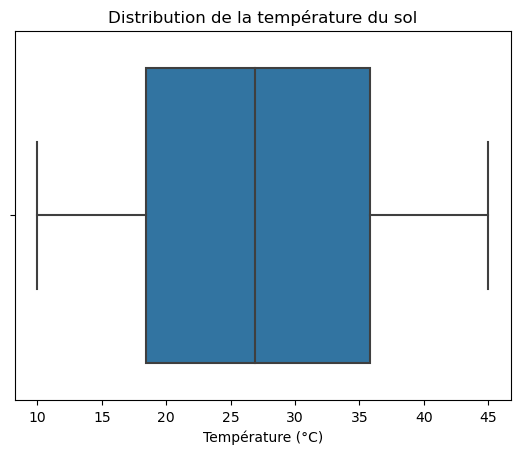

In [36]:
# Crée un boxplot pour visualiser la distribution des températures du sol
sns.boxplot(x=df["Temperature_C"])

# Ajoute un titre au graphique
plt.title("Distribution de la température du sol")

# Ajoute un label à l’axe des x
plt.xlabel("Température (°C)")

# Affiche le graphique
plt.show()


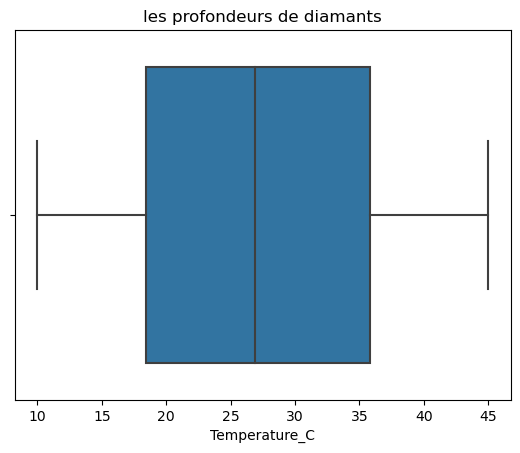

In [37]:
# Crée un boxplot de la température du sol avec un titre personnalisé
sns.boxplot(x=df["Temperature_C"]).set_title("Distribution de la température du sol")


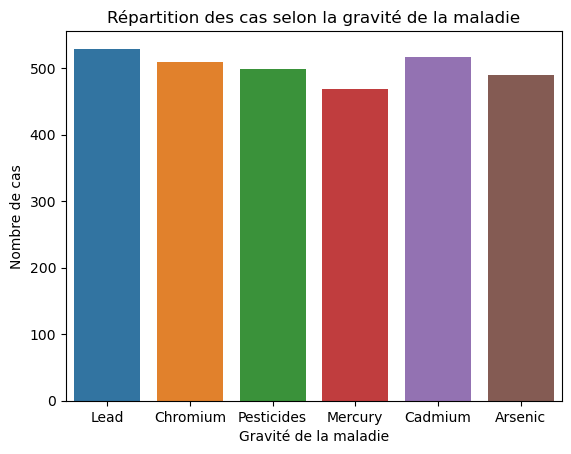

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trace un countplot pour la variable 'Pollutant_Type' dans le DataFrame df
sns.countplot(data=df, x='Pollutant_Type')

# Définit le titre du graphique
plt.title("Répartition des cas selon la gravité de la maladie")

# Définit le label de l’axe des x
plt.xlabel("Gravité de la maladie")

# Définit le label de l’axe des y
plt.ylabel("Nombre de cas")

# Affiche le graphique
plt.show()


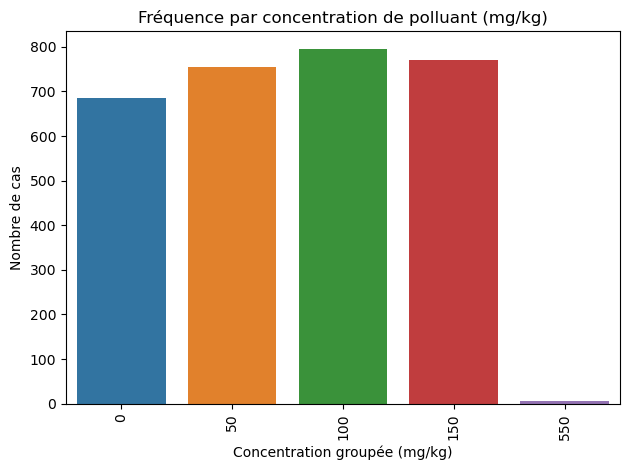

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crée une nouvelle colonne 'concentration_grouped' en regroupant la concentration du polluant par intervalles de 50 mg/kg
df['concentration_grouped'] = (df['Pollutant_Concentration_mg_kg'] // 50) * 50

# Trace un countplot de la fréquence des cas par groupe de concentration, en ordonnant les barres par valeurs croissantes
ax = sns.countplot(data=df, x='concentration_grouped', order=sorted(df['concentration_grouped'].unique()))

# Personnalise les étiquettes des ticks de l’axe x pour qu’elles affichent des nombres entiers
ax.set_xticklabels([f'{x:.0f}' for x in sorted(df['concentration_grouped'].unique())])

# Ajoute un titre au graphique
ax.set_title("Fréquence par concentration de polluant (mg/kg)")

# Ajoute un label à l’axe x
plt.xlabel("Concentration groupée (mg/kg)")

# Ajoute un label à l’axe y
plt.ylabel("Nombre de cas")

# Fait pivoter les étiquettes de l’axe x pour améliorer la lisibilité
plt.xticks(rotation=90)

# Ajuste automatiquement la mise en page pour éviter les chevauchements
plt.tight_layout()

# Affiche le graphique
plt.show()


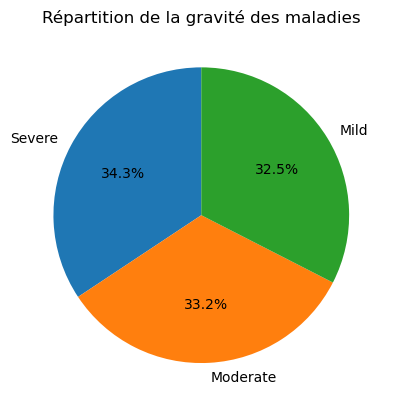

In [43]:
# Trace un diagramme en camembert montrant la répartition en pourcentage des différentes gravités de maladies dans la colonne 'Disease_Severity'
df['Disease_Severity'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',              # Affiche les pourcentages sur le graphique
    startangle=90,                  # Angle de départ pour une meilleure présentation
    title='Répartition de la gravité des maladies',
    ylabel=''                       
)


plt.show()


In [ ]:
-> La gravité des maladies la plus trouvée dans le dataset est "la maladie de type severe"



Text(0.5, 1.0, 'Température vs Humidité selon le type de polluant')

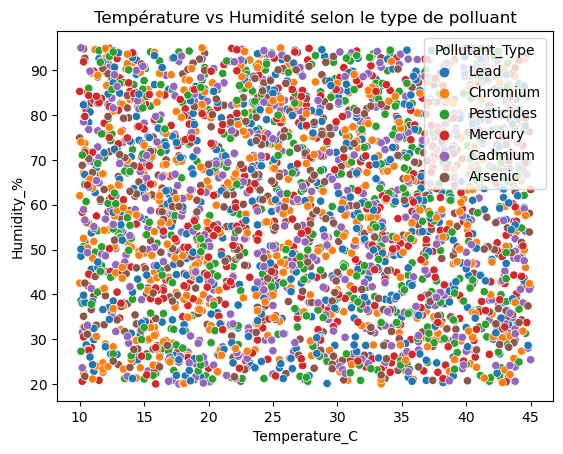

In [46]:
# Trace un nuage de points (scatterplot) de la température en fonction de l'humidité,
# avec les points colorés selon le type de polluant
sns.scatterplot(
    x='Temperature_C',
    y='Humidity_%',
    hue='Pollutant_Type',  # ou 'Disease_Severity' pour colorer selon la gravité
    data=df
).set_title("Température vs Humidité selon le type de polluant")


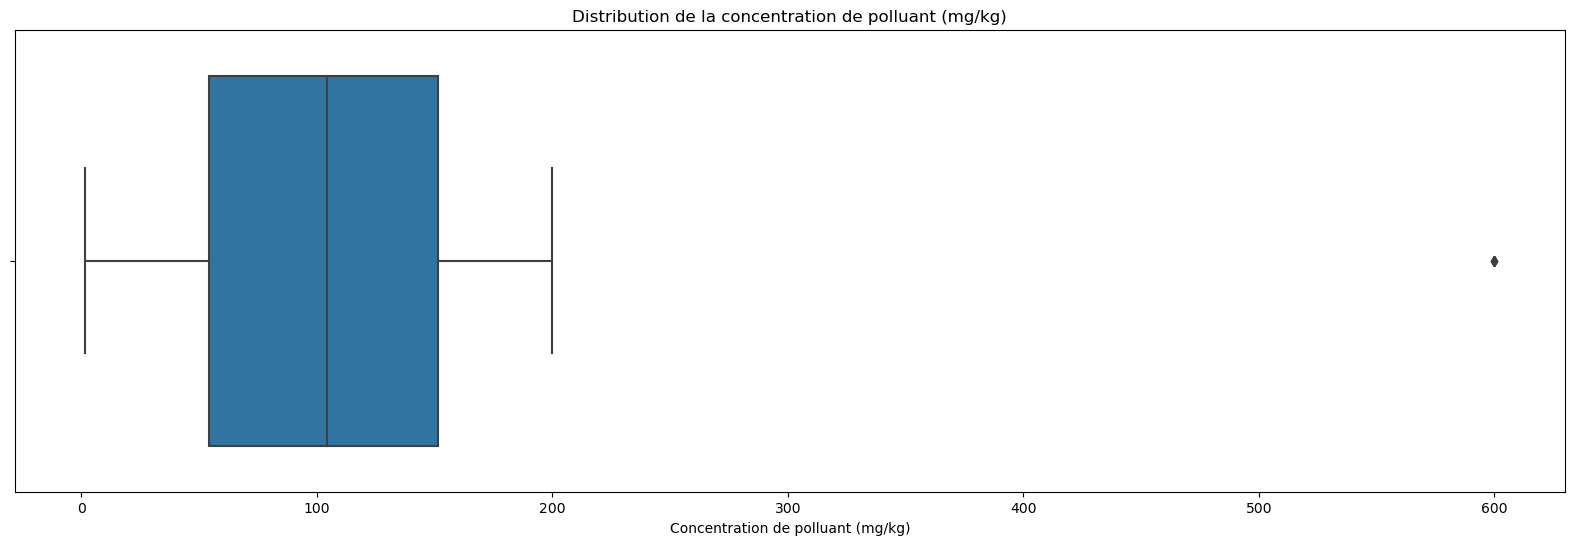

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 6))

# Crée un boxplot de la concentration de polluant pour visualiser sa distribution
sns.boxplot(x=df["Pollutant_Concentration_mg_kg"])


plt.title("Distribution de la concentration de polluant (mg/kg)")


plt.xlabel("Concentration de polluant (mg/kg)")

plt.show()


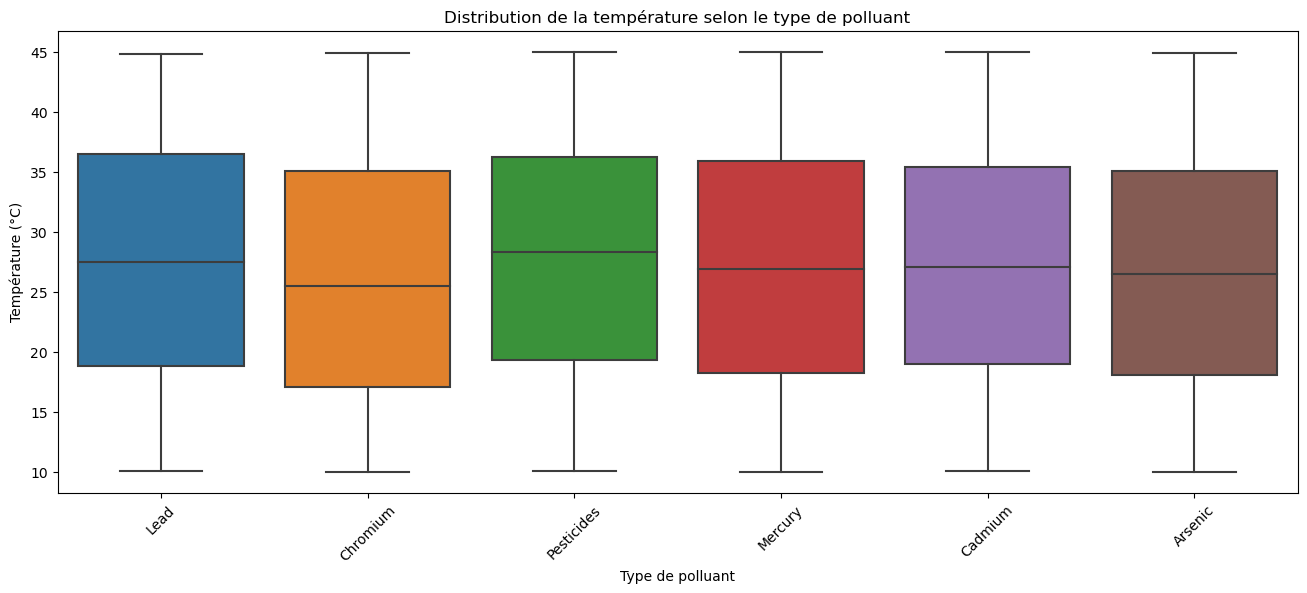

In [51]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Pollutant_Type', y='Temperature_C', data=df)
plt.title("Distribution de la température selon le type de polluant")
plt.xlabel("Type de polluant")
plt.ylabel("Température (°C)")
plt.xticks(rotation=45)
plt.show()


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Trace un graphique de régression montrant la relation entre la température et les précipitations
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Temperature_C",
    y="Rainfall_mm",
    fit_reg=True,
    marker="+",
    data=df
).set_title("Relation entre la température et les précipitations")
plt.xlabel("Température (°C)")
plt.ylabel("Précipitations (mm)")
plt.show()
->Ce graphique de régression montre la relation entre la température du sol et les précipitations, mettant en évidence une tendance linéaire qui permet d’observer comment la température influence les niveaux de pluie .

SyntaxError: invalid character '’' (U+2019) (2346362611.py, line 17)

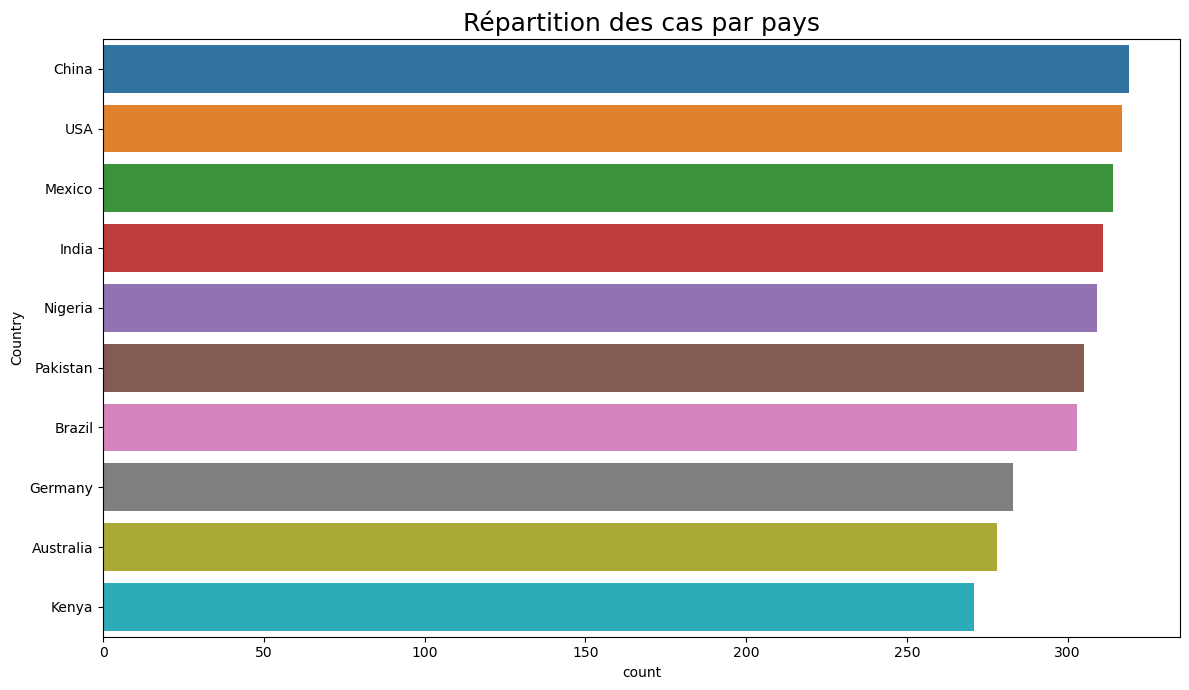

In [59]:
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    y='Country',
    order=df['Country'].value_counts().index
)
plt.title('Répartition des cas par pays', fontsize=18)
plt.tight_layout()
plt.show()


In [60]:
print(f"La médiane de la concentration de polluant (mg/kg) est : {df['Pollutant_Concentration_mg_kg'].median()}")


La médiane de la concentration de polluant (mg/kg) est : 104.08500000000001


In [62]:
print(f"La moyenne de la concentration de polluant (mg/kg) est : {df['Pollutant_Concentration_mg_kg'].mean()}")


La moyenne de la concentration de polluant (mg/kg) est : 103.40365227021042


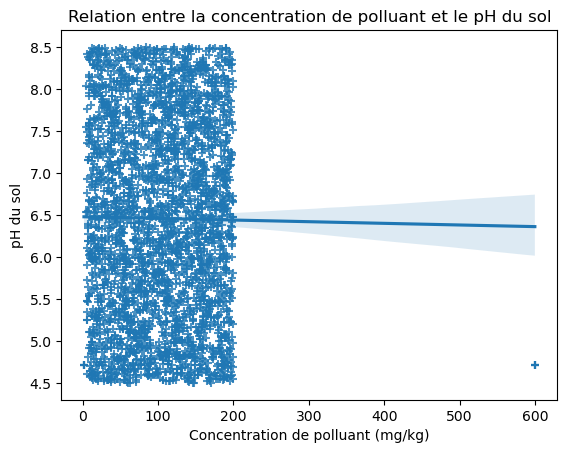

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x="Pollutant_Concentration_mg_kg",
    y="Soil_pH",
    fit_reg=True,
    marker="+",
    data=df
).set_title("Relation entre la concentration de polluant et le pH du sol")

plt.xlabel("Concentration de polluant (mg/kg)")
plt.ylabel("pH du sol")
plt.show()


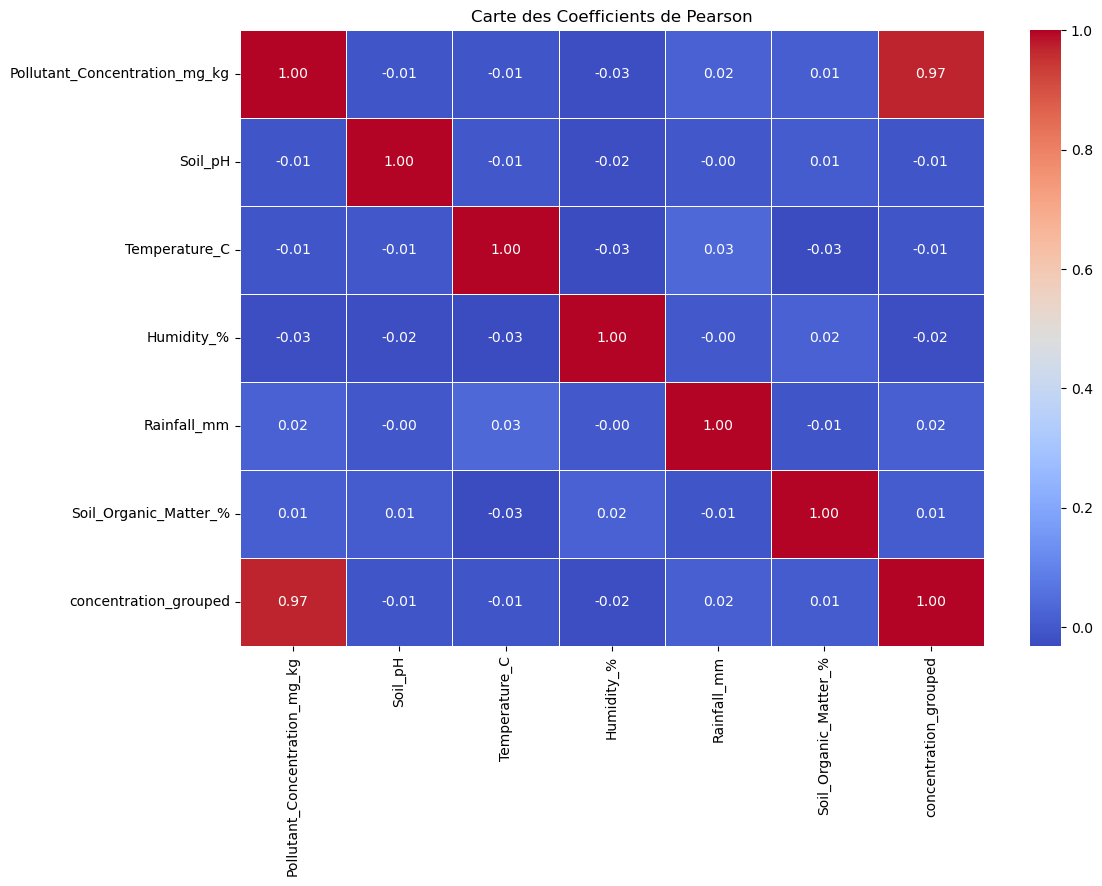

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the first column (often an ID or non-informative column)
df = df.drop(columns=[df.columns[0]])

# Keep only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Carte des Coefficients de Pearson')
plt.show()


In [ ]:
 Seule la variable concentration_grouped présente une corrélation très forte (0.97) avec la concentration de polluant, ce qui est attendu puisqu’elle en est une version groupée.

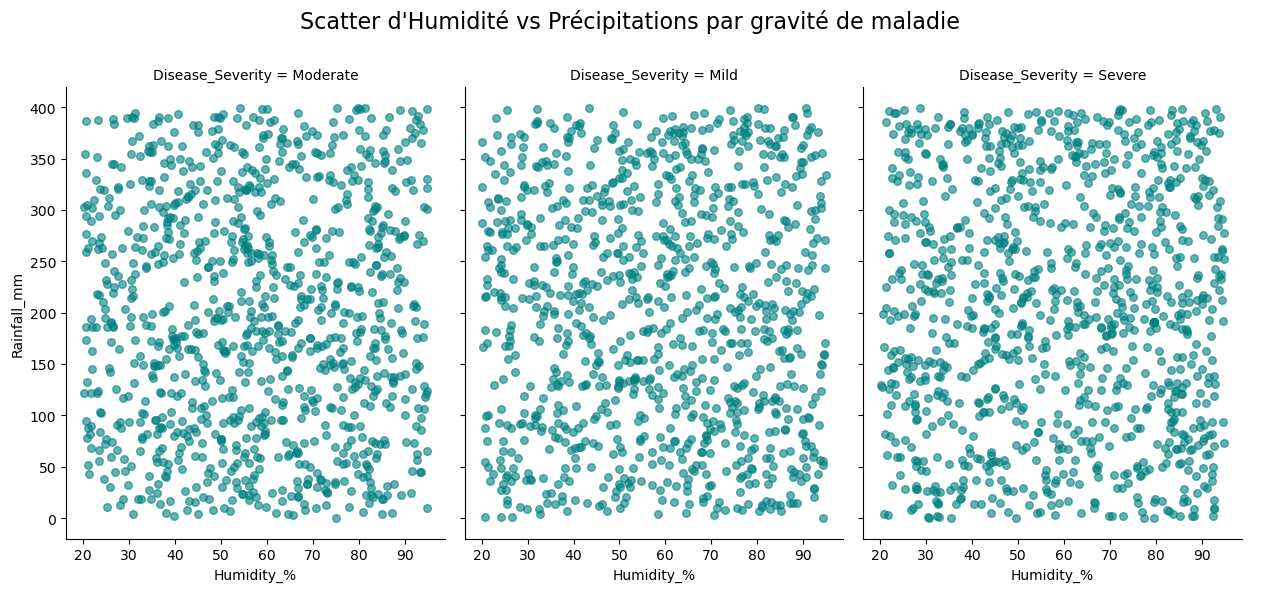

In [77]:
sns.FacetGrid(df, col="Disease_Severity", height=6, aspect=0.7) \
   .map(plt.scatter, "Humidity_%", "Rainfall_mm", alpha=0.6, s=30, color='teal') \
   .add_legend()

plt.subplots_adjust(top=0.85)
plt.suptitle("Scatter d'Humidité vs Précipitations par gravité de maladie", fontsize=16)
plt.show()


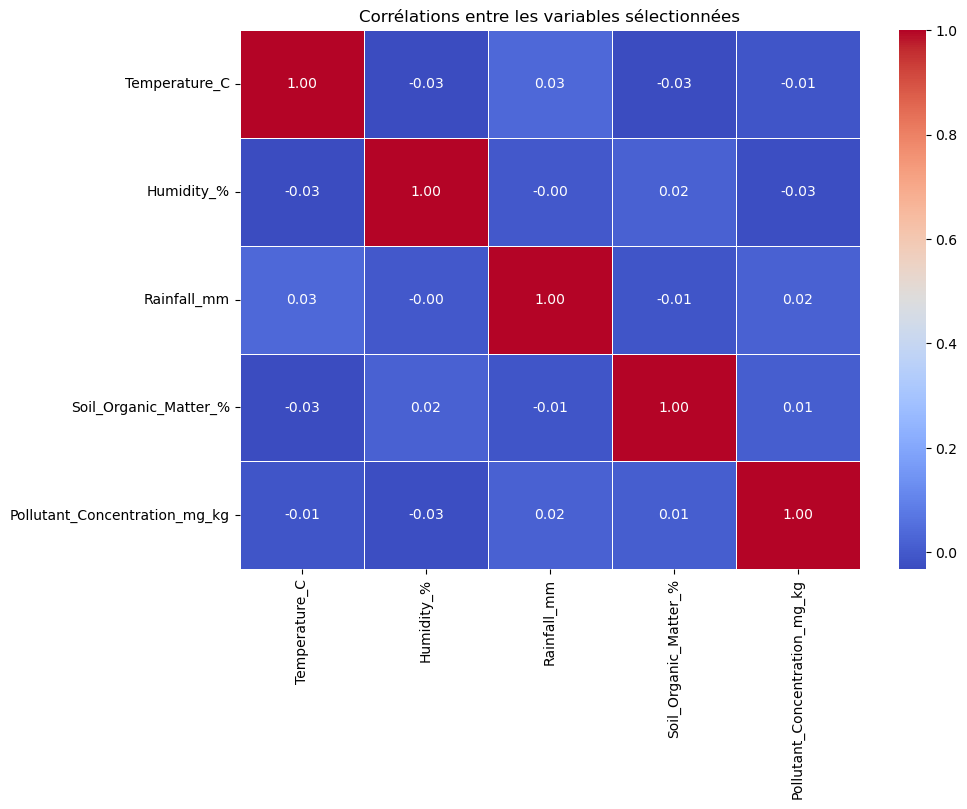

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    'Temperature_C', 
    'Humidity_%', 
    'Rainfall_mm', 
    'Soil_Organic_Matter_%', 
    'Pollutant_Concentration_mg_kg'
]

plt.figure(figsize=(10, 7))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Corrélations entre les variables sélectionnées')
plt.show()


In [66]:
print("Écart-type de l'humidité :", df["Humidity_%"].std())
print("Variance de l'humidité :", round(df["Humidity_%"].var(), 2))


Écart-type de l'humidité : 21.357990118751587
Variance de l'humidité : 456.16


In [67]:
var = df["Humidity_%"].max() - df["Humidity_%"].min()
print("L'étendue de l'humidité (%) est :", var)


L'étendue de l'humidité (%) est : 75.0


In [65]:
# Concaténation de deux séries : 
# 1. Le nombre d’occurrences de chaque type de polluant
# 2. La proportion (fréquence relative) de chaque type de polluant
aff = pd.concat([
    df["Pollutant_Type"].value_counts(),                # Nombre total pour chaque type de polluant
    df["Pollutant_Type"].value_counts(normalize=True)   # Proportion relative pour chaque type
], axis=1)

# Renommage des colonnes pour plus de clarté
aff.columns = ['Nombre', 'Proportion']


print(aff)


                Nombre  Proportion
Pollutant_Type                    
Lead               529    0.175748
Cadmium            516    0.171429
Chromium           509    0.169103
Pesticides         499    0.165781
Arsenic            489    0.162458
Mercury            468    0.155482


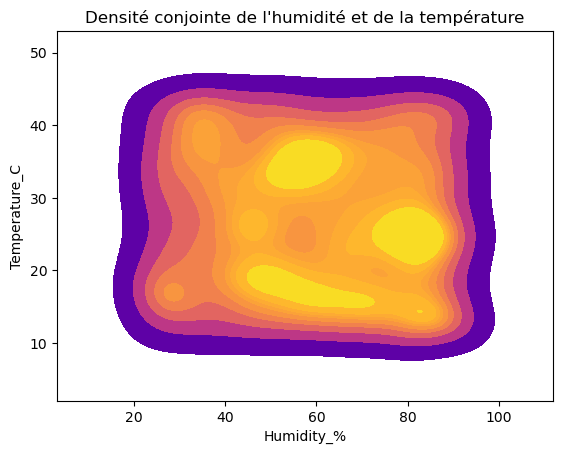

In [80]:
sns.kdeplot(
    x="Humidity_%",
    y="Temperature_C",
    shade=True,
    data=df,
    cmap="plasma",
    thresh=0.05
).set_title("Densité conjointe de l'humidité et de la température")

plt.show()


Text(0.5, 1.0, 'Densité conjointe de la température et des précipitations')

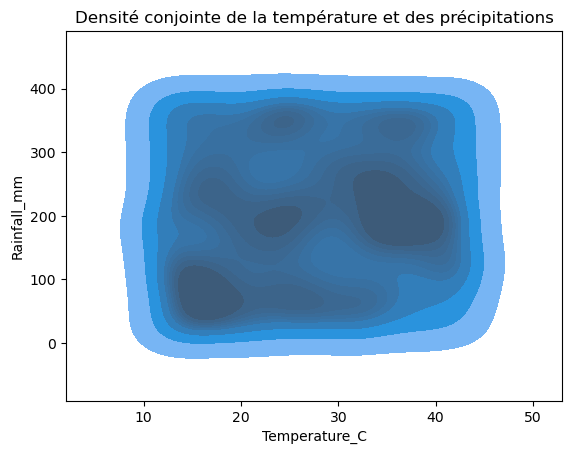

In [83]:
# Densité des points en 2D entre la température et les précipitations
sns.kdeplot(
    x="Temperature_C",
    y="Rainfall_mm",
    shade=True,
    data=df
).set_title("Densité conjointe de la température et des précipitations")


In [84]:
# Tableau de contingence entre le type de polluant et la gravité de la maladie
pd.crosstab(df["Pollutant_Type"], df["Disease_Severity"])


Disease_Severity,Mild,Moderate,Severe
Pollutant_Type,,,
Arsenic,161,152,176
Cadmium,165,185,166
Chromium,168,156,185
Lead,164,181,184
Mercury,145,156,167
Pesticides,176,168,155


In [85]:
# Tableau de contingence entre le type de polluant et la région
pd.crosstab(df["Pollutant_Type"], df["Region"])


Region,Africa,Asia,Australia,Europe,North America,South America
Pollutant_Type,,,,,,
Arsenic,93,78,74,78,87,79
Cadmium,94,84,72,81,94,91
Chromium,79,76,103,81,79,91
Lead,81,100,84,94,80,90
Mercury,87,90,78,67,73,73
Pesticides,94,100,78,82,77,68


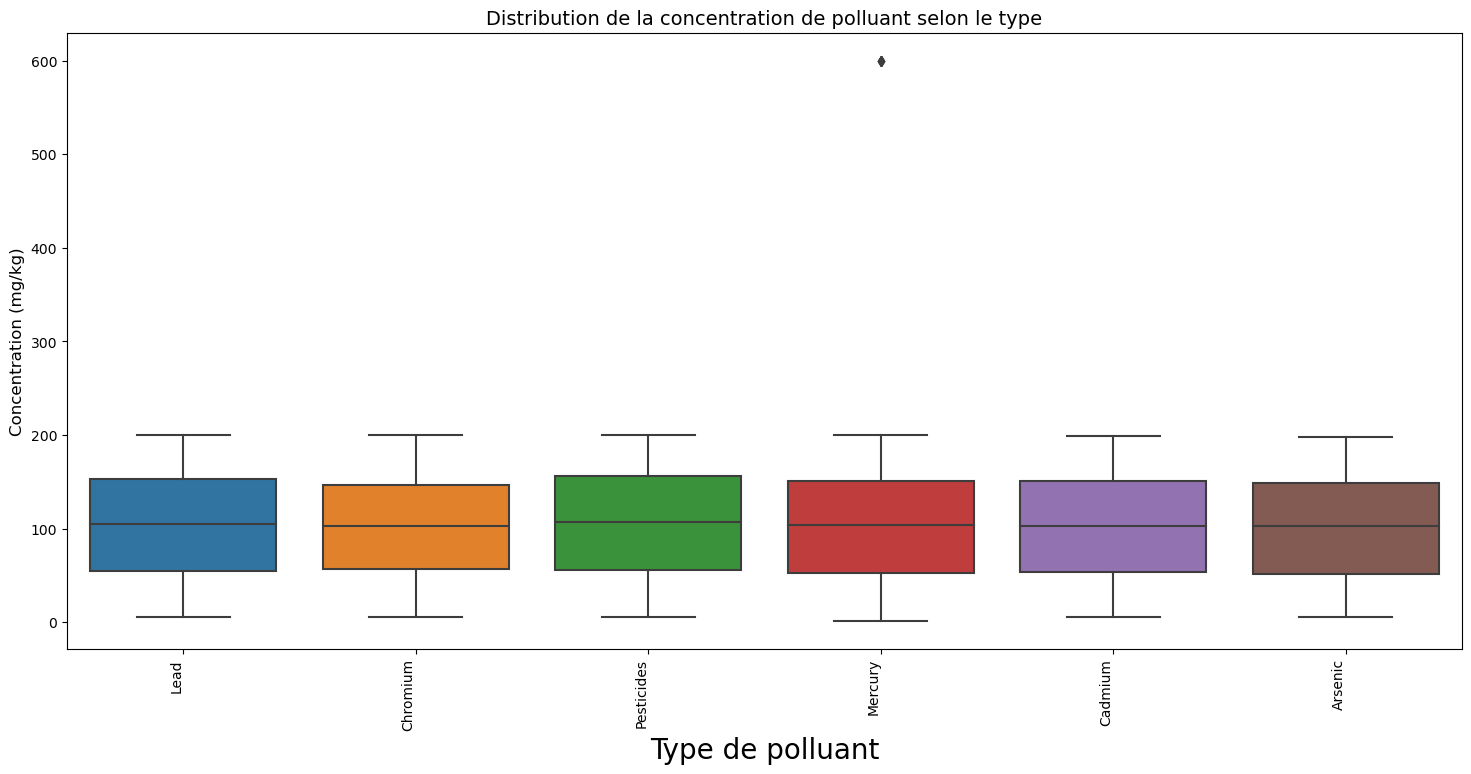

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.boxplot(x="Pollutant_Type", y="Pollutant_Concentration_mg_kg", data=df)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Type de polluant", fontsize=20)
plt.ylabel("Concentration (mg/kg)", fontsize=12)
plt.title("Distribution de la concentration de polluant selon le type", fontsize=14)
plt.show()


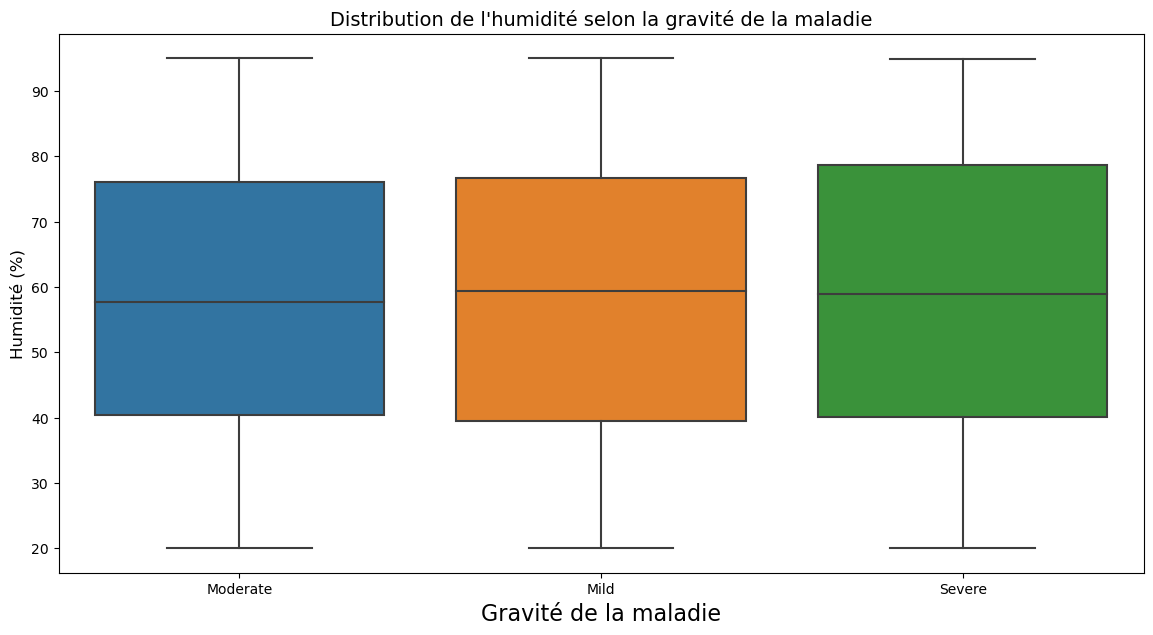

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x="Disease_Severity", y="Humidity_%", data=df)
plt.xlabel("Gravité de la maladie", fontsize=16)
plt.ylabel("Humidité (%)", fontsize=12)
plt.title("Distribution de l'humidité selon la gravité de la maladie", fontsize=14)
plt.show()


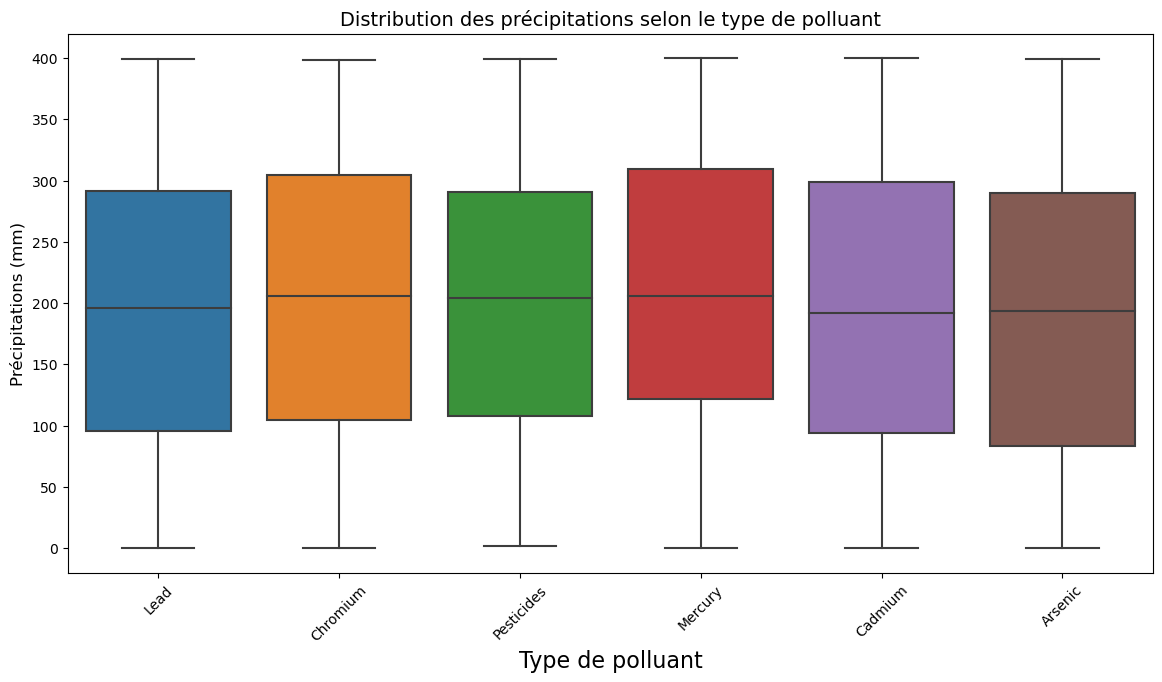

In [91]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="Pollutant_Type", y="Rainfall_mm", data=df)
plt.xlabel("Type de polluant", fontsize=16)
plt.ylabel("Précipitations (mm)", fontsize=12)
plt.title("Distribution des précipitations selon le type de polluant", fontsize=14)
plt.xticks(rotation=45)
plt.show()


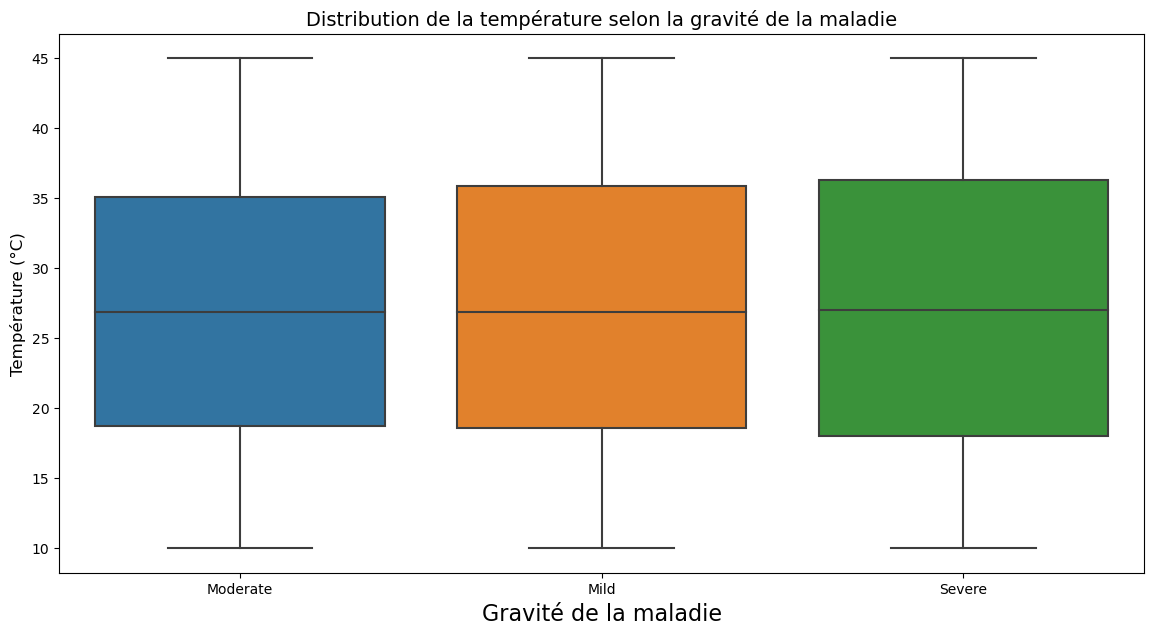

In [92]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="Disease_Severity", y="Temperature_C", data=df)
plt.xlabel("Gravité de la maladie", fontsize=16)
plt.ylabel("Température (°C)", fontsize=12)
plt.title("Distribution de la température selon la gravité de la maladie", fontsize=14)
plt.show()


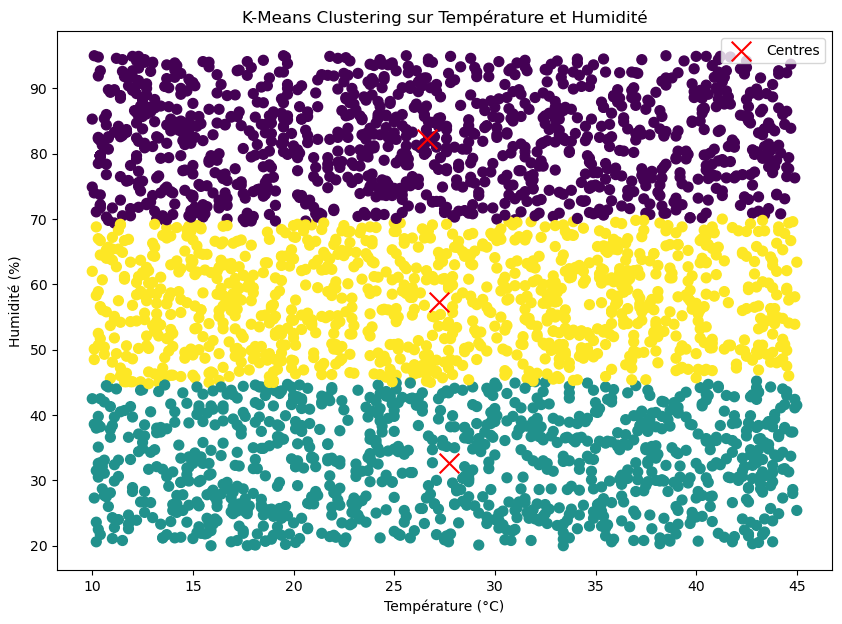

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Données pour le clustering
X = df[["Temperature_C", "Humidity_%"]]

# Appliquer K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Affichage des clusters
plt.figure(figsize=(10, 7))
plt.scatter(X["Temperature_C"], X["Humidity_%"], c=kmeans.labels_, cmap="viridis", s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red", s=200, marker="x", label="Centres")
plt.xlabel("Température (°C)")
plt.ylabel("Humidité (%)")
plt.title("K-Means Clustering sur Température et Humidité")
plt.legend()
plt.show()


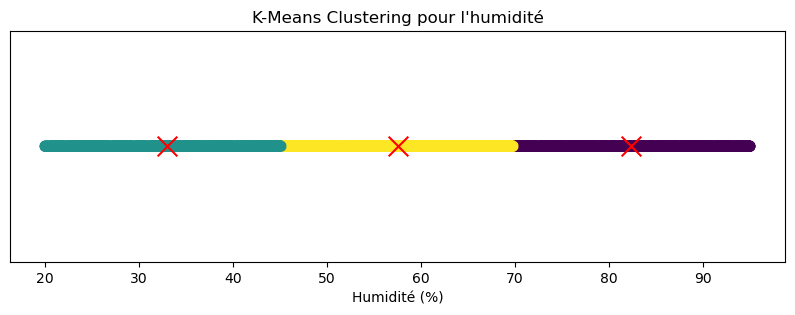

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Appliquer K-Means sur l'humidité
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[["Humidity_%"]])

# Affichage
plt.figure(figsize=(10, 3))
plt.scatter(df["Humidity_%"], [0]*len(df), c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_, [0]*3, marker='x', s=200, c='red')
plt.title("K-Means Clustering pour l'humidité")
plt.xlabel("Humidité (%)")
plt.yticks([])
plt.show()


In [ ]:
il ya du coup 3 clusters selon le pourcentage d'humidité', peu humide ,humide,et très humide

Accuracy sur les données d'entraînement : 0.24


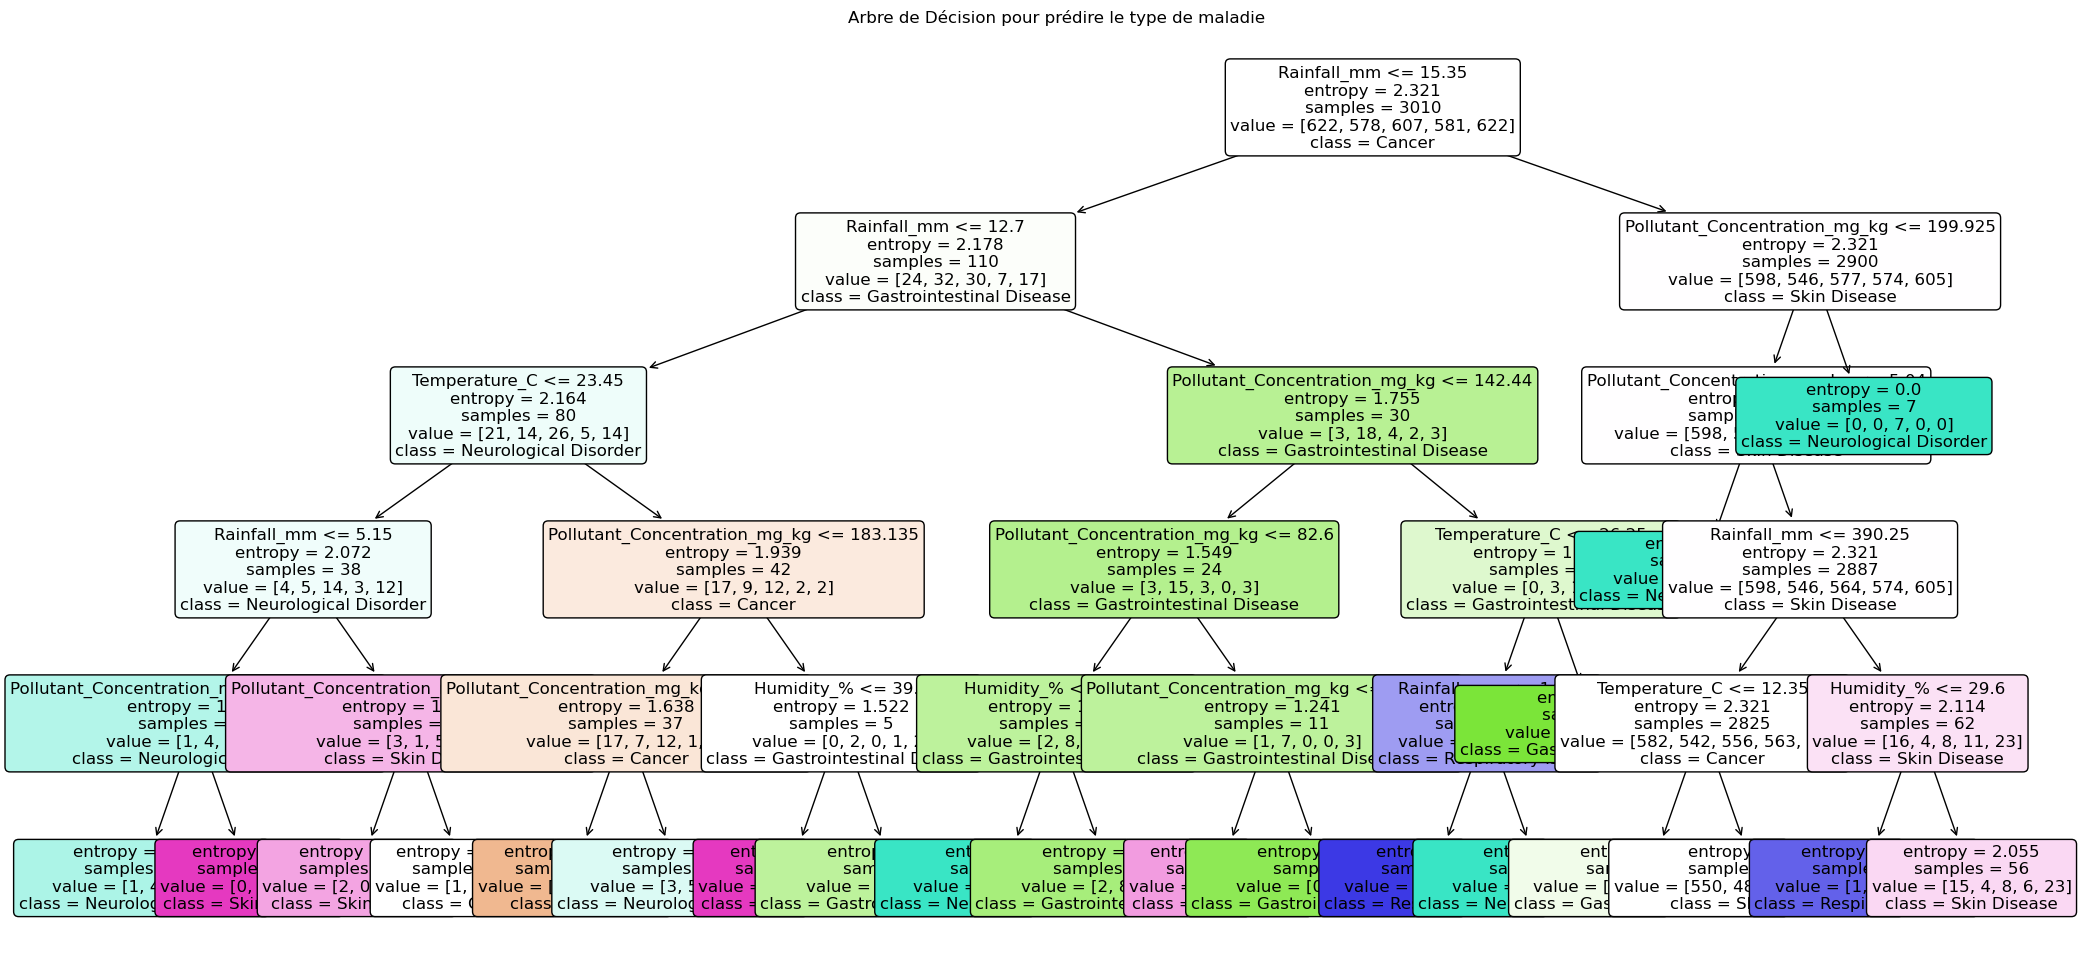

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features to use for prediction
features = ["Temperature_C", "Humidity_%", "Rainfall_mm", "Soil_Organic_Matter_%", "Pollutant_Concentration_mg_kg"]

X = df[features]
y = df["Disease_Type"]  # Make sure this column exists in your dataframe

# Drop rows with missing values in X or y
X = X.dropna()
y = y.loc[X.index]

# Convert target labels to strings (if needed)
y = y.astype(str)

# Prepare class names for the plot
class_names = sorted(y.unique())

# Train the decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(25, 12))
plot_tree(
    clf,
    filled=True,
    feature_names=features,
    class_names=class_names,
    rounded=True,
    fontsize=12
)
plt.title("Arbre de Décision pour prédire le type de maladie")
plt.show
from sklearn.metrics import accuracy_score

# Prédiction sur les mêmes données utilisées pour l'entraînement
y_pred = clf.predict(X)

# Calcul de l'accuracy sur l'ensemble complet
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy sur les données d'entraînement : {accuracy:.2f}")




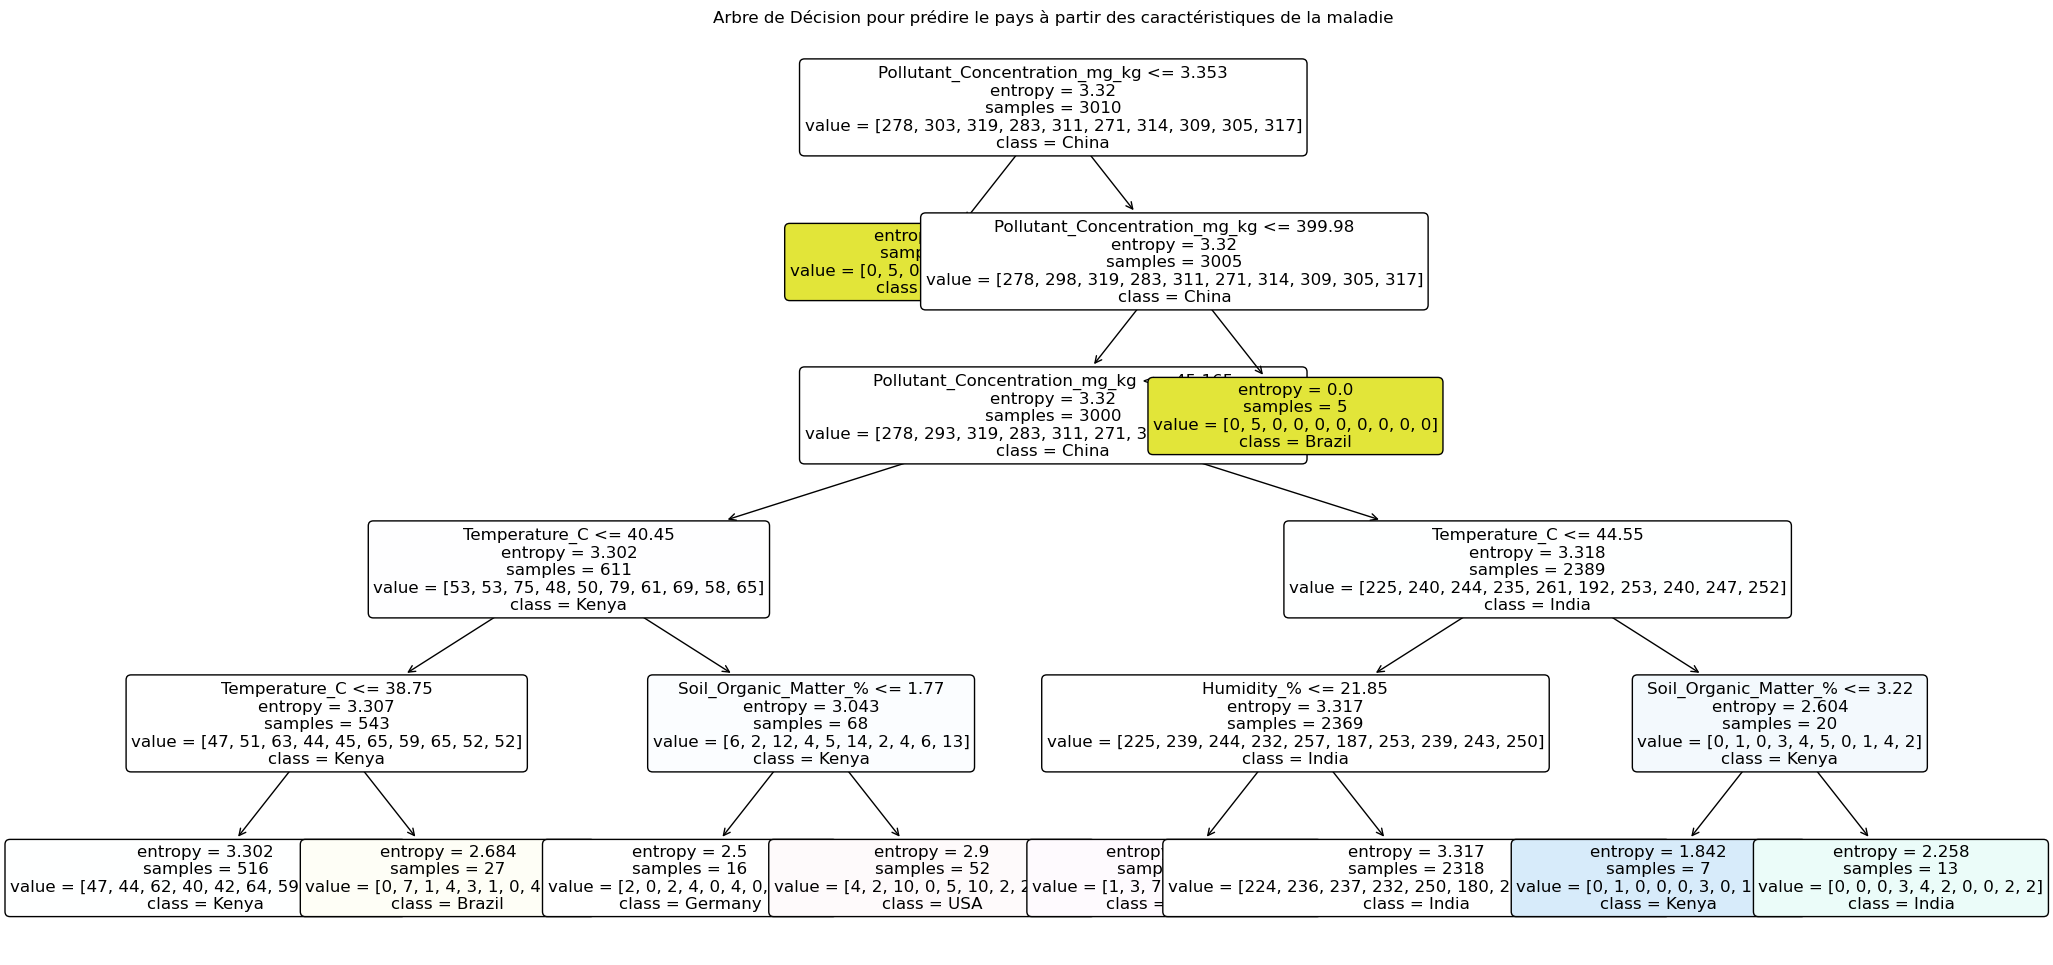

Accuracy sur les données d'entraînement : 0.12


In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define features that describe the disease or environment
features = ["Temperature_C", "Humidity_%", "Rainfall_mm", "Soil_Organic_Matter_%", "Pollutant_Concentration_mg_kg"]

X = df[features]
y = df["Country"]  # Replace with the exact country column name

# Drop missing values in X or y
X = X.dropna()
y = y.loc[X.index]

# Convert target labels to strings if needed
y = y.astype(str)

# Get unique country names for class labels
class_names = sorted(y.unique())

# Train decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(25, 12))
plot_tree(
    clf,
    filled=True,
    feature_names=features,
    class_names=class_names,
    rounded=True,
    fontsize=12
)
plt.title("Arbre de Décision pour prédire le pays à partir des caractéristiques de la maladie")
plt.show()
from sklearn.metrics import accuracy_score

# Prédiction sur les mêmes données utilisées pour l'entraînement
y_pred = clf.predict(X)

# Calcul de l'accuracy sur l'ensemble complet
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy sur les données d'entraînement : {accuracy:.2f}")



In [ ]:
Construction d'un arbre de décision qui apprend à prédire le pays d’origine d’un échantillon en fonction de caractéristiques  liées à la maladie (température, humidité, pluviométrie,etc..).

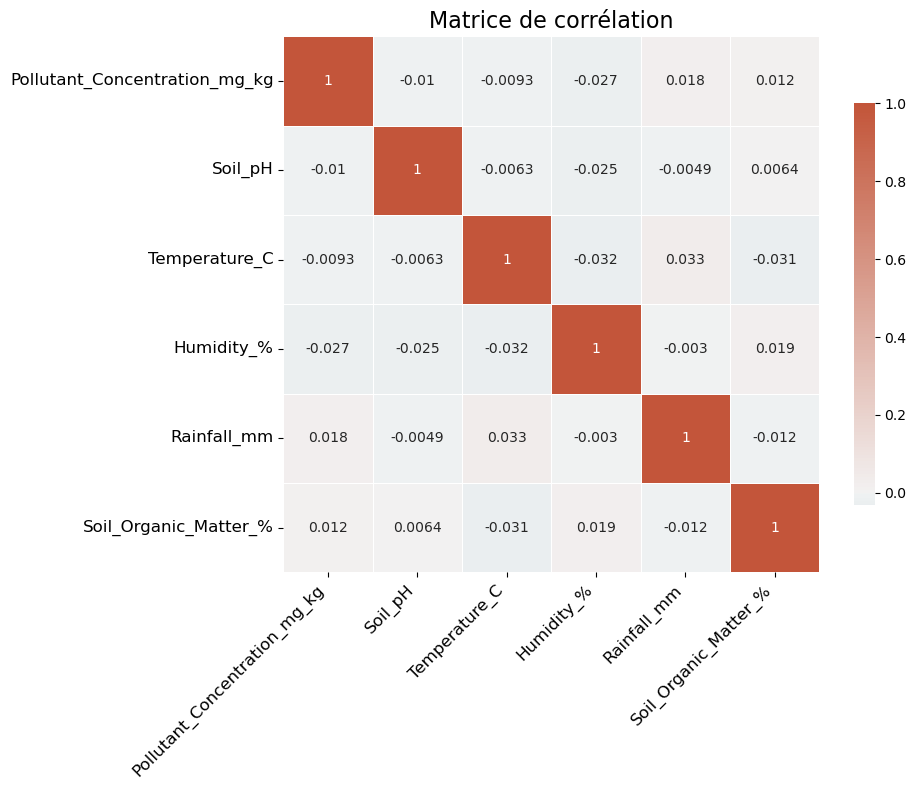

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes pertinentes pour l’analyse de corrélation
cols = [
    'Pollutant_Concentration_mg_kg',    
    'Soil_pH',                           
    'Temperature_C',                  
    'Humidity_%',                      
    'Rainfall_mm',                     
    'Soil_Organic_Matter_%'             
]


for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

# Calcul de la matrice de corrélation en ignorant les valeurs manquantes (NaN)
corr = df[cols].corr()

# Affichage de la carte thermique (heatmap) de la matrice de corrélation
plt.figure(figsize=(10, 8))  # Taille de la figure

sns.heatmap(
    corr,
    annot=True,  # Affiche les valeurs de corrélation dans les cases
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    center=0,     # Centre de la palette de couleur à 0 (utile pour bien voir les positifs/négatifs)
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.75}  # Réduction de la taille de la barre de couleur
)

#
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Titre du graphique
plt.title('Matrice de corrélation', fontsize=16)

# Ajustement automatique du layout pour éviter le chevauchement
plt.tight_layout()

# Affichage final
plt.show()

# Ce code permet de visualiser la corrélation entre différentes variables environnementales
# (température, humidité, pH du sol, concentration de polluant, etc.) à l’aide d’une carte thermique (heatmap).
# Cela aide à identifier les relations linéaires positives ou négatives entre les variables,
# ce qui est utile pour la sélection de variables ou l’interprétation de phénomènes environnementaux.


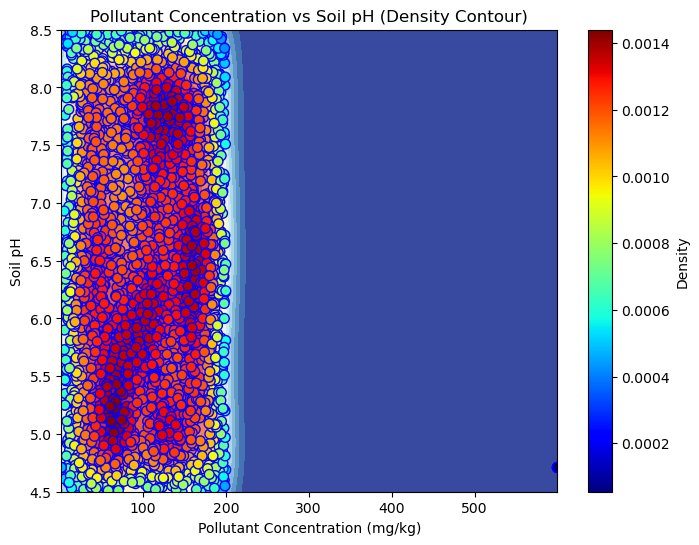

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Suppression des valeurs manquantes dans les deux colonnes sélectionnées
tmp = df[['Pollutant_Concentration_mg_kg', 'Soil_pH']].dropna()

x = tmp['Pollutant_Concentration_mg_kg'] 
y = tmp['Soil_pH']                        

# Calcul de la densité des points (estimation de la densité par noyau)
xy = np.vstack([x, y])                    # Empilement des deux séries en matrice 2xN
z = gaussian_kde(xy)(xy)                  # Densité estimée pour chaque point

# Création d'une grille de coordonnées pour la visualisation en contours
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j] 
zi = gaussian_kde(xy)(np.vstack([xi.flatten(), yi.flatten()]))  

plt.figure(figsize=(8, 6))  

# Tracé du contour rempli (zones de densité) avec une palette de couleur
plt.contourf(xi, yi, zi.reshape(xi.shape), levels=15, cmap='RdYlBu_r')

# Ajout des points réels en superposition, colorés selon leur densité locale
plt.scatter(x, y, c=z, s=50, edgecolor='blue', cmap='jet')  


plt.colorbar(label='Density')


plt.xlabel("Pollutant Concentration (mg/kg)")
plt.ylabel("Soil pH")
plt.title("Pollutant Concentration vs Soil pH (Density Contour)")

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Sélection des variables explicatives et de la variable cible
features = ["Temperature_C", "Humidity_%", "Rainfall_mm", "Soil_Organic_Matter_%", "Pollutant_Concentration_mg_kg"]
target = "Disease_Severity"

# Préparation des données : suppression des lignes avec des valeurs manquantes dans les features,
# puis récupération des étiquettes cibles correspondantes
X = df[features].dropna()
y = df.loc[X.index, target]

# Séparation des données en jeu d'entraînement (80%) et jeu de test (20%) pour évaluer la performance du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement d'un modèle Random Forest avec une graine aléatoire fixe pour assurer la reproductibilité
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédiction des classes sur le jeu de test
y_pred = clf.predict(X_test)

# Évaluation de la performance du modèle :
# - Affichage de l'accuracy : proportion de bonnes prédictions sur le jeu de test
# - Affichage du rapport de classification détaillé (précision, rappel, F1-score pour chaque classe)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
